In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

## Doc du lieu, truc quan du lieu

In [5]:
data = pd.read_csv(r"D:\Jupiter_notebook\Training_Project\Data\DS\add.csv")
data.head()

,x,y,sum
0,1.0,1.0,2.0
1,4.0,4.0,8.0
2,6.0,6.0,12.0
3,10.0,10.0,20.0
4,30.0,30.0,60.0


In [15]:
data.shape

(22, 3)

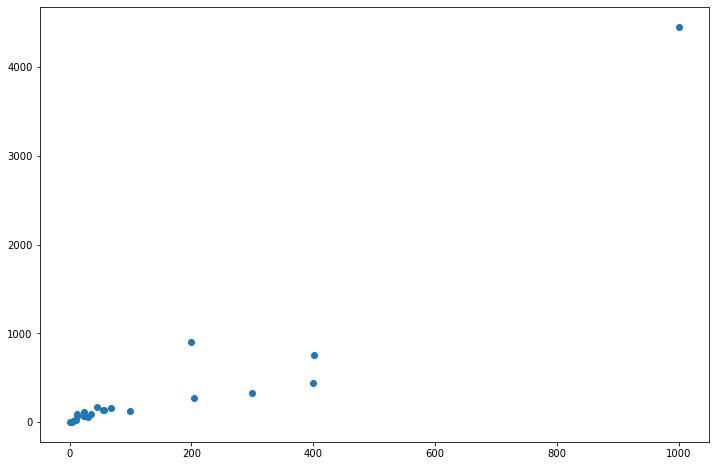

In [7]:
plt.scatter(data['x'], data['sum']);

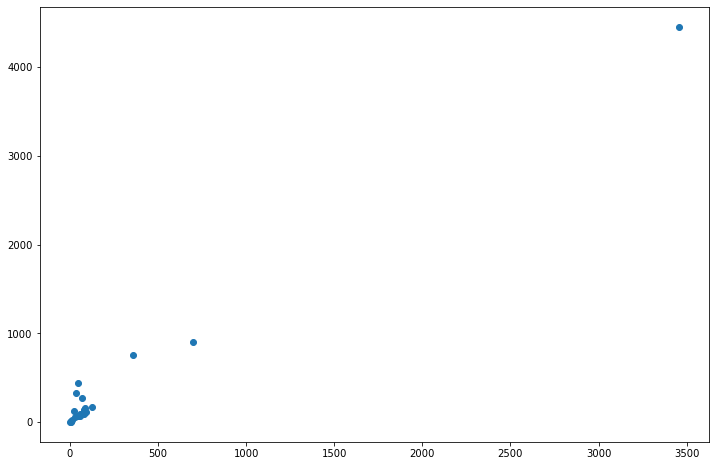

In [8]:
plt.scatter(data['y'], data['sum']);

## 1. Store features matrix in X and target in vector y

In [12]:
X = data[['x', 'y']]
y = data['sum']


0        2.0
1        8.0
2       12.0
3       20.0
4       60.0
5       66.0
6      135.0
7      122.0
8       68.0
9      134.0
10      91.0
11     334.0
12      69.2
13     112.9
14     155.7
15     900.0
16     271.5
17     445.7
18      91.5
19     756.5
20     169.4
21    4456.0
Name: sum, dtype: float64

## 2. Train/Test split
1. Split data into two part: a training set and a testing set
2. Train the model on training set
3. Test the Model on testing set

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
X_train

,x,y
3,10.0,10.0
4,30.0,30.0
17,400.0,45.7
12,12.5,56.7
18,34.6,56.9
16,203.6,67.9
2,6.0,6.0
9,56.0,78.0
21,1000.0,3456.0
7,100.0,22.0


## 3. Import and Train the Model

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 4. Check Model's Predection Performance

In [17]:
model.score(X_train, y_train)

1.0

In [18]:
model.score(X_test, y_test)

1.0

## 5. Comparing the results

In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred

array([  2. , 112.9,  68. ,   8. , 900. ,  66. , 169.4, 334. ])

In [22]:
y_test

0       2.0
13    112.9
8      68.0
1       8.0
15    900.0
5      66.0
20    169.4
11    334.0
Name: sum, dtype: float64

In [24]:
df = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
df

,Actual,Predict
0,2.0,2.0
13,112.9,112.9
8,68.0,68.0
1,8.0,8.0
15,900.0,900.0
5,66.0,66.0
20,169.4,169.4
11,334.0,334.0


## 6. Predict

In [29]:
model.predict([[3, 7]])

D:\INSTALL\anacoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.])

In [30]:
model.predict([[5.234, 7.654]])

D:\INSTALL\anacoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.888])

## 7. Save Model usign Joblib

In [32]:
import joblib

In [37]:
joblib.dump(model, 'model_joblib')

['model_joblib']

In [38]:
model = joblib.load('model_joblib')

In [39]:
model.predict([[15, 22]])

D:\INSTALL\anacoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37.])

## 8. GUI

In [41]:
from tkinter import *

In [56]:
def show_entry_fields():
    p1 = float(e1.get())
    p2 = float(e2.get())
    
    model = joblib.load('model_joblib')
    result = model.predict([[p1, p2]])
    
    Label(master, text = 'Sum is ').grid(row=4)
    Label(master, text=result).grid(row=5)
    print('Sum is  ', result)
    
master = Tk()
master.title('Addition of Two numbers using ML')

label = Label(master, text = 'Addition of two number using ML',
             bg='black', fg='white').grid(row=0, columnspan=2)


Label(master, text='Enter first number: ').grid(row=1)
Label(master, text='Enter second number: ').grid(row=2)

e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

D:\INSTALL\anacoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Sum is   [14.66562]
